# Visualizing Data with DataFrames

Being able to visualize data is important for recognizing patterns and making data-driven decisions. The [Seaborn](https://seaborn.pydata.org/introduction.html) package is built on top of Matplotlib and used for visualizing data, especially tabular data like the kind in `DataFrame` objects. 


## Setup

In the cell below, we import the relevant libraries and create an initial `DataFrame`. 

To render the graphs in this notebook, we'll [set the Matplotlib backend to be `inline`](https://stackoverflow.com/a/43028034/1577649) so that figures appear directly below the cells.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read data from a local CSV file into a DataFrame object
df = pd.read_csv('data/weather/nyc.csv')
df.head(3)

,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
0,1,1948-07-01,84,78.0,72,71,65,58,93,65,...,2.0,16,8,NaN,0.00,0.0,Fog,264<br />,New York City (USA),Summer
1,2,1948-07-02,82,72.0,63,62,53,49,76,51,...,10.0,16,10,NaN,0.00,0.0,NaN,315<br />,New York City (USA),Summer
2,3,1948-07-03,78,71.0,64,66,58,53,84,62,...,5.0,14,6,NaN,0.00,0.0,NaN,203<br />,New York City (USA),Summer


Let's clean up the `Date` field in the `DataFrame` object so that we can use it more effectively in our visualizations. It is currently a string (`object` data type) and we want to convert it to an actual date object.

Note how after conversion, the `Date` column's type is now `datetime64[ns]`.

In [2]:
print('Type before conversion:', df.dtypes['Date'])

df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
print('Type after conversion:', df.dtypes['Date'])

Type before conversion: object
Type after conversion: datetime64[ns]


## Line Graph

Let's start with a simple line graph that maps the mean temperature over time. To keep the graph readable, we'll only use the last 2000 data points, by creating a new truncated `DataFrame` with the `tail()` method.

The [`seaborn.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) function returns a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object. The `fig` property on this object is in turn a [`matplotlib.figure.Figure`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) object. 

Using the [`autofmt_xdate()`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate) method, we can format the x-axis to be more readable. This is especially helpful, when there are many labels crowding around each other.

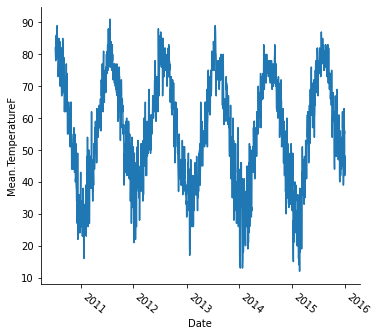

In [3]:
# Create a line plot
g = sns.relplot(x="Date", y="Mean.TemperatureF", kind="line", data=df.tail(2000))

# Format the date labels on the x-axis
g.fig.autofmt_xdate(rotation=320, ha='left')

As expected from weather data, the average temperature fluctuates each day, but is periodic over the years, following the seasons.

## Scatter Plot

A scatter plot can be used to determine if two values are correlated.

In this example, we check to see if the visibility is correlated to the Precipitation.

Before we can do that, however, we need to clean up some of our data. The column `PrecipitationIn` appears to be the `object` data type, meaning we are dealing with strings instead of numbers. Let's cast it first.

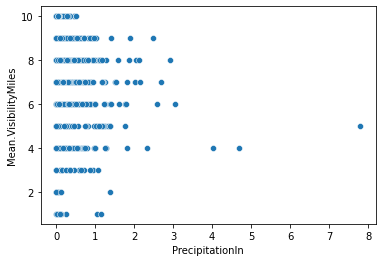

In [4]:
# Cast PrecipitationIn from string to a numerical value
df['PrecipitationIn'] = pd.to_numeric(df['PrecipitationIn'], errors='coerce')

g = sns.scatterplot(x="PrecipitationIn", y="Mean.VisibilityMiles", data=df.tail(2000))

There doesn't seem to be much of a correlation between the two. What about between visibility and humidity?

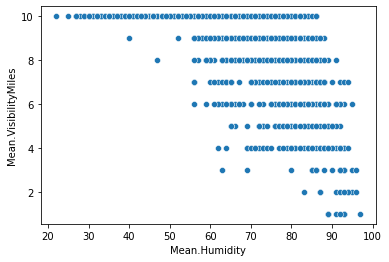

In [5]:
g = sns.scatterplot(x="Mean.Humidity", y="Mean.VisibilityMiles", data=df.tail(2000))

Here there seems to be some relationship. When the humidity is higher, visibility tends to be lower. That makes sense since more water in the air can be signs of fog, snow, haze or other conditions that make it difficult to see. In contrast, we see that on drier days, visbility is usually much higher.

You are not limited to just two variables in visualizations. The `hue` parameter can be used, for example, to group related data points by another column give them a similar color. Other grouping parameters can be used like `style` and `size`, which may be more accessible to viewers with visual impairments.

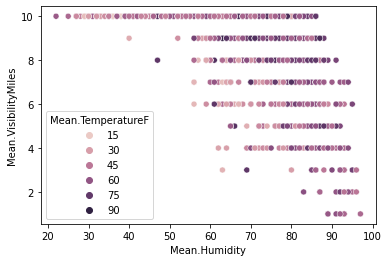

In [6]:
g = sns.scatterplot(x="Mean.Humidity", 
                    y="Mean.VisibilityMiles", 
                    hue='Mean.TemperatureF', 
                    data=df.tail(2000))

## Bar Graph

Bar graphs are useful for visualizing discrete data points.

For this example, we'll plot the total precipitation each year for the last ten years. The first step is to group the datapoints by year, using the `DataFrame.groupby()` function, which produces a `DataFrameGroupBy` object. On this object you can call an [aggregate function](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/) such as `sum()`. 

Calling an aggregate function returns a new `DataFrame` with an `index` based on the field that you grouped by.

In [14]:
# Group by year and sum all column values in the same year
# Reminder: df['Date'] is of type datetime64[ns], so the year must be extracted
grp_by_year = df.groupby(df['Date'].dt.year)
print('Data type after using groupby():', type(grp_by_year))
by_year_sum = grp_by_year.sum()
print('Date type after using sum():', type(by_year_sum), '\n')

by_year_sum.info()
by_year_sum.index

Data type after using groupby(): <class 'pandas.core.groupby.generic.DataFrameGroupBy'>
Date type after using sum(): <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1948 to 2015
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 68 non-null     int64  
 1   Max.TemperatureF           68 non-null     int64  
 2   Mean.TemperatureF          68 non-null     float64
 3   Min.TemperatureF           68 non-null     int64  
 4   Max.Dew.PointF             68 non-null     int64  
 5   MeanDew.PointF             68 non-null     int64  
 6   Min.DewpointF              68 non-null     int64  
 7   Max.Humidity               68 non-null     int64  
 8   Mean.Humidity              68 non-null     int64  
 9   Min.Humidity               68 non-null     int64  
 10  Max.Sea.Level.PressureIn   68 non-null     float64
 11  Me

Int64Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
            1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015],
           dtype='int64', name='Date')

Our current `DataFrame` object `by_year_sum` has 68 records, corresponding to 68 years of data. We only want the last ten years, so we can simply use the `tail()` function to get the most recent 10 years.

For visibility we can call the `matplotlib.pyplot.figure()` function to set the width and height of the plot, in inches.

In addition, we want to add a descriptive title and update the x-axis and y-axis labels to be more accurate. The `seaborn.barplot()` function returns a `matplotlib.axes.Axes` object. [According to the documenation](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), we can set the title and labels with a few simple methods, shown below. The functions all accept a `fontdict` parameter to control the labels' styling.

Finally, we can annotate the plot by putting the actual values on top of each bar. We loop through each bar in the plot and apply the [`matplotlib.axes.Axes.annotate()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate) function with the text and location we want to add. The point we want to annotate (the parameter `xy`) is the center of the top of the bar, which is why we calculate with the x-coordinate, width and height of the bar. We then place the text at the same x-coordinate, but offset 9 points above the annotation coordinate (using a negative value would put the text _inside_ the bar). Lastly, we align the text in the center horizontally and vertically.

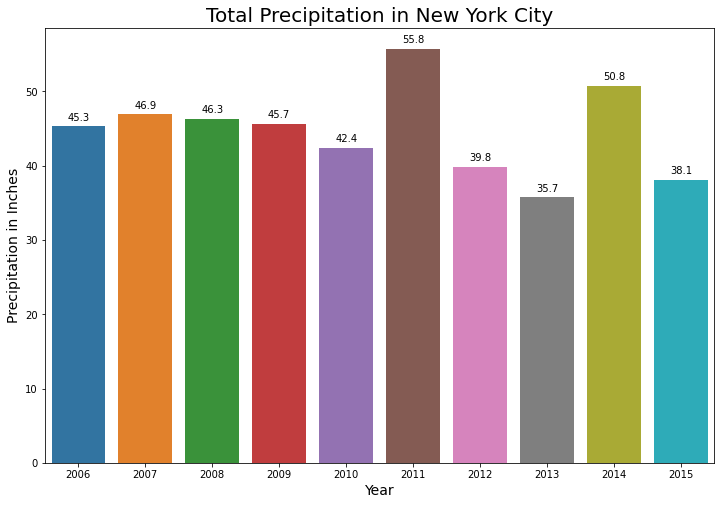

In [35]:
# Our data
last_ten = by_year_sum.tail(n=10)

# Set figure size in inches (width, height)
plt.figure(figsize=(12, 8))

# Create the plot
g = sns.barplot(data=last_ten, x=last_ten.index, y='PrecipitationIn')

# Add labels
g.set_title(label='Total Precipitation in New York City', fontdict={'fontsize': 20})
axis_font = fontdict={'fontsize': 14}
g.set_xlabel(xlabel='Year', fontdict=axis_font)
g.set_ylabel(ylabel='Precipitation in Inches', fontdict=axis_font)

# Annotate the bars with their values
for bar in g.patches:
    bar_text = format(bar.get_height(), '.1f')
    annotation_coords = (bar.get_x() + bar.get_width()/2, bar.get_height())
    text_coords = (0, 9)
    text_offset_type = 'offset points'
    
    g.annotate(text=bar_text, xy=annotation_coords, xytext=text_coords, textcoords=text_offset_type, ha='center', va='center')